In [1]:
import numpy as np 
import pandas as pd
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns

#ensemble Learning
# pca
#auto encoder -> for dimnention reduction


In [2]:
bc = pd.read_csv('Breast_Cancer.csv')
bc.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.

META DATA :
https://ieee-dataport.org/open-access/seer-breast-cancer-data

In [3]:
# Rename columns
bc.rename(columns={'T Stage ': 'Tumor Stage', 'N Stage': 'Node Stage' , 'A Stage' : 'Advanced Stage' }, inplace=True)

#new_column_order = ['Tumor Stage', 'Node Stage', '6th Stage', 'Grade', 'Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Race', 'Marital Status', 'differentiate', 'Advanced Stage', 'Estrogen Status', 'Progesterone Status', 'Status']

#bc = bc.reindex(columns=new_column_order)



In [4]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   Tumor Stage             4024 non-null   object
 4   Node Stage              4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   Advanced Stage          4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
bc.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [6]:
print('The number of people who lived and died :')
bc['Status'].value_counts()

The number of people who lived and died :


Alive    3408
Dead      616
Name: Status, dtype: int64

Visualization 

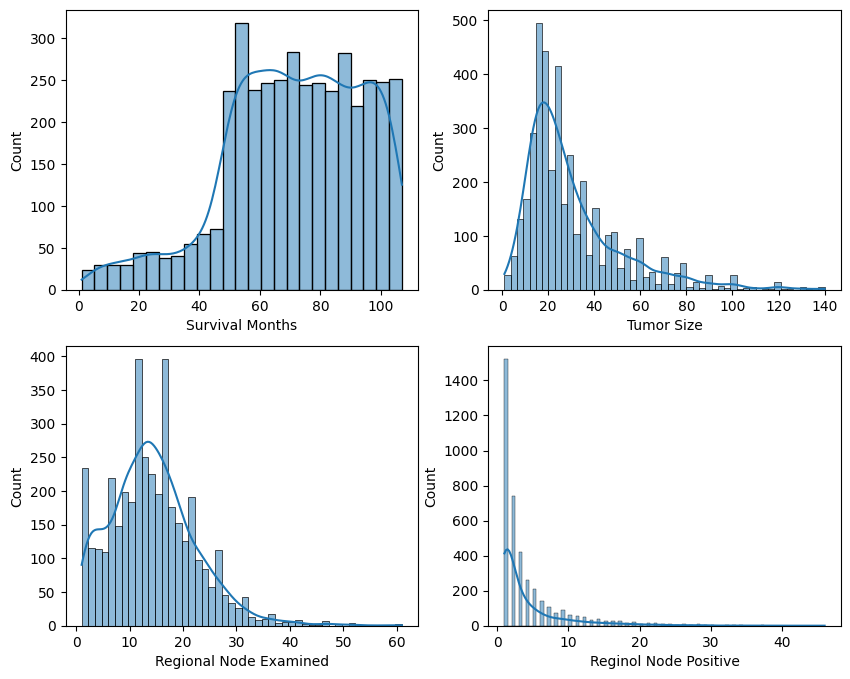

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(bc['Survival Months'] , ax=axes[0, 0] , kde=True)
sns.histplot(bc['Tumor Size'] , ax=axes[0, 1] , kde=True )
sns.histplot(bc['Regional Node Examined'], ax=axes[1,0] , kde=True)
sns.histplot(bc['Reginol Node Positive'], ax=axes[1,1] , kde=True)
plt.show()

The graphs above are a general scheme based on the frequency of numerical data.

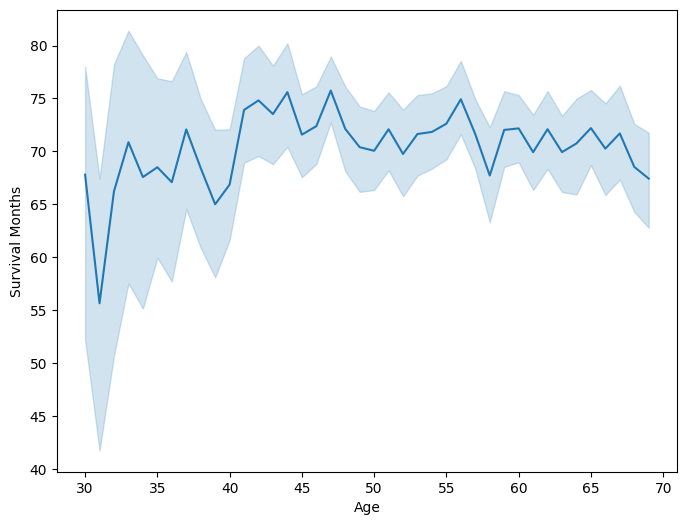

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

sns.lineplot(x='Age', y='Survival Months' , data=bc , ax=axes)


plt.show()


From the diagram above, it can be concluded that the probability of survival is low between the ages of 30 and 33.

Age


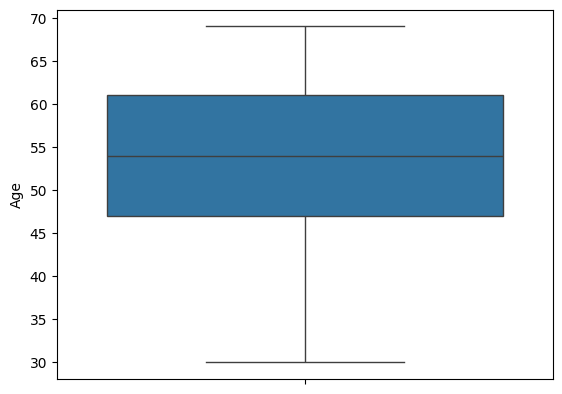

Survival Months


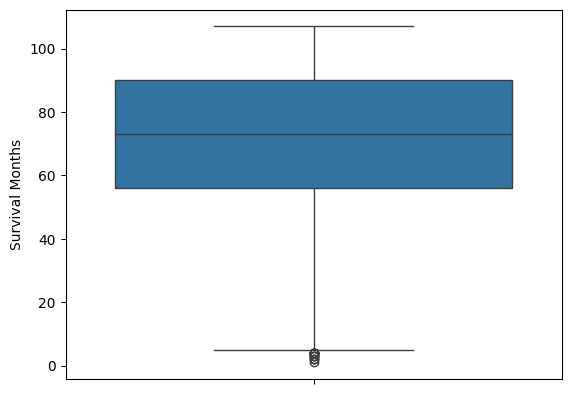

Tumor Size


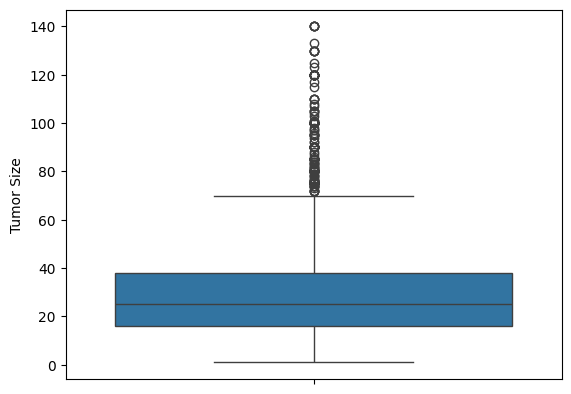

Regional Node Examined


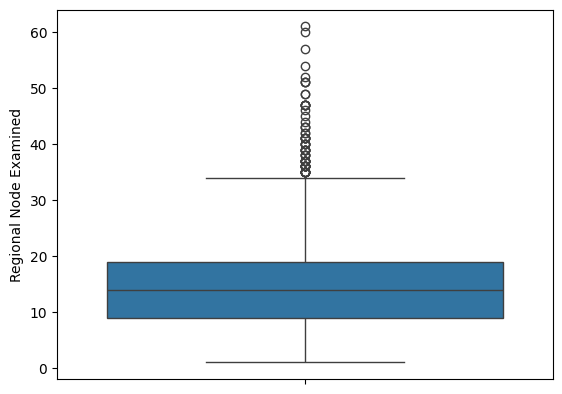

Reginol Node Positive


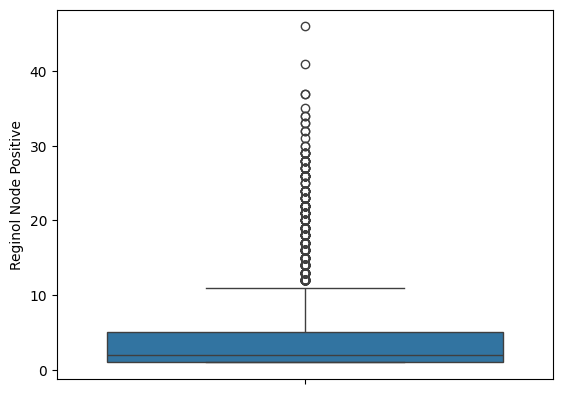

In [9]:
features = ['Age','Survival Months' , 'Tumor Size' , 'Regional Node Examined', 'Reginol Node Positive' ]

def plot_hist(bc, features):
    for feature in features:
        sns.boxplot(y=feature, data=bc )
        print(feature)
        plt.show()

plot_hist(bc,features)


Age


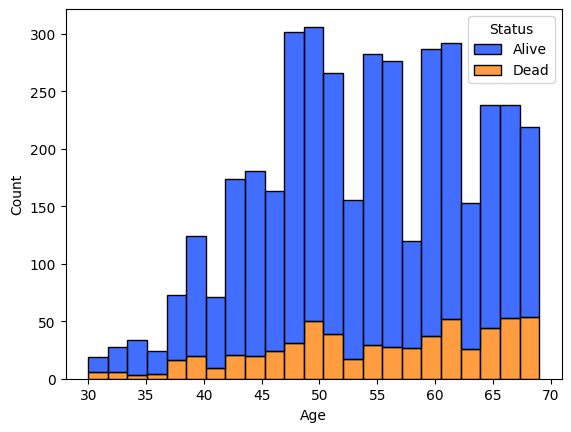

Race


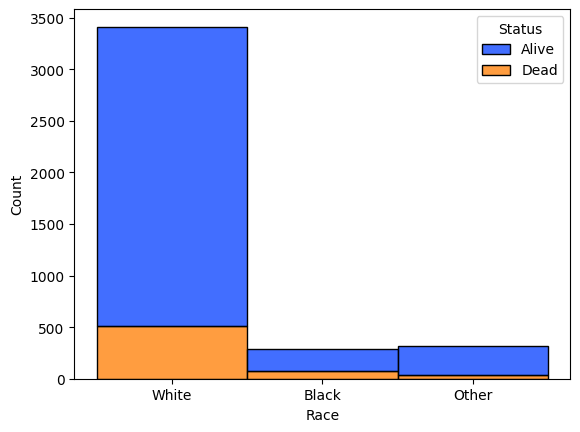

Marital Status


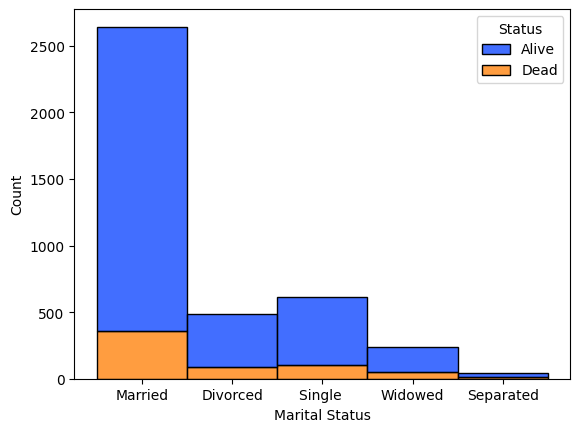

Tumor Stage


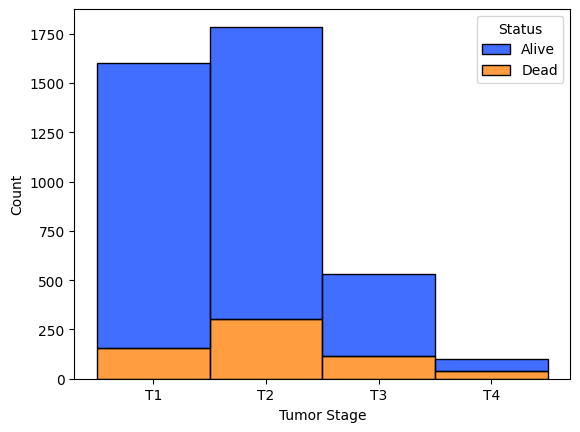

Node Stage


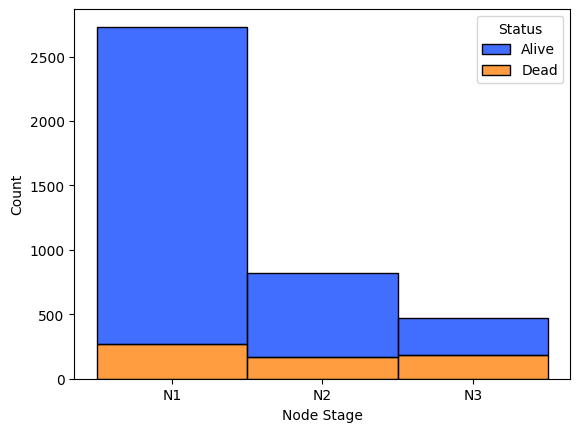

6th Stage


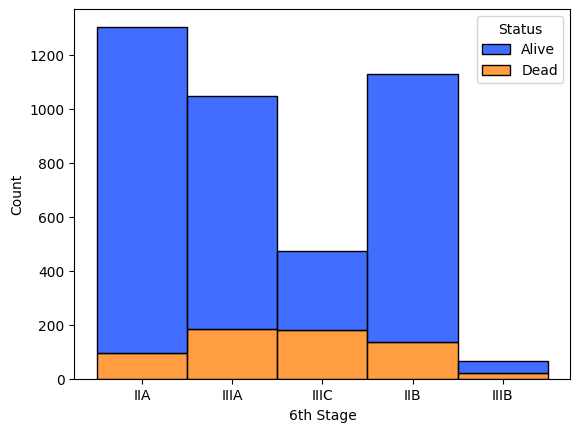

differentiate


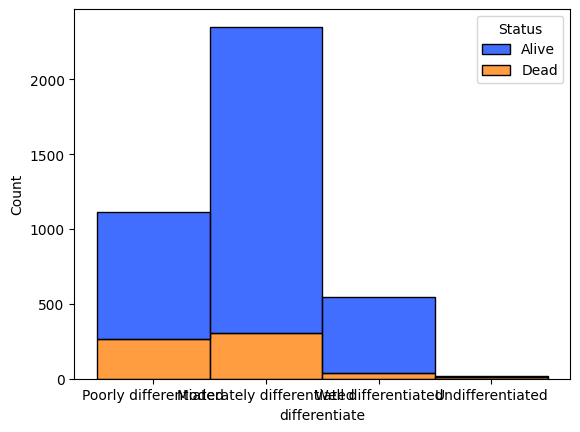

Grade


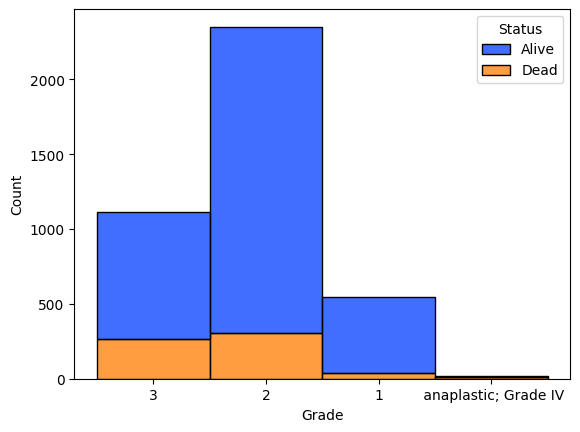

Advanced Stage


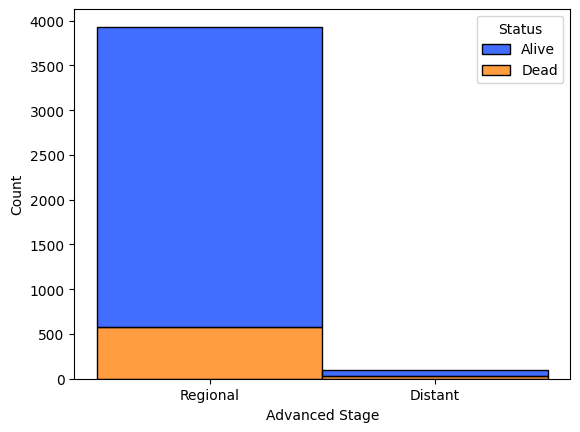

Tumor Size


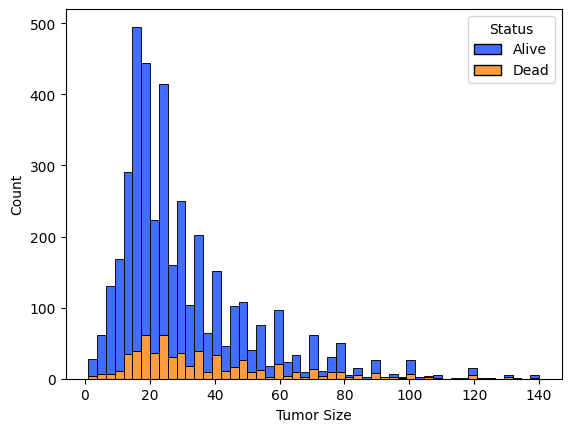

Estrogen Status


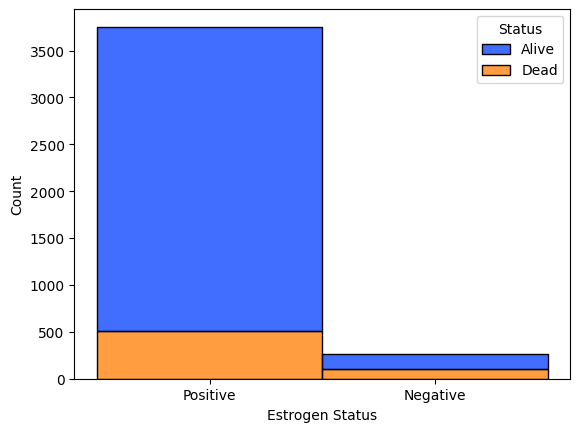

Progesterone Status


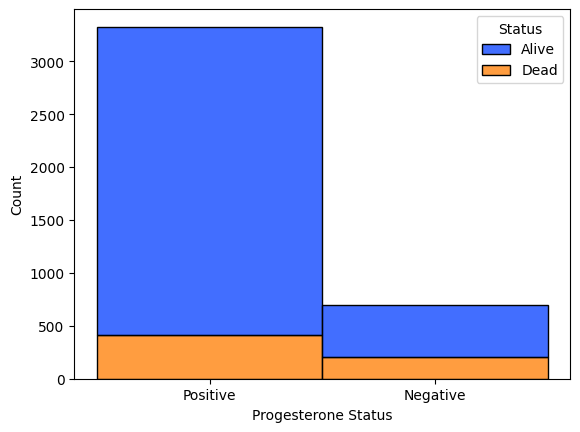

Regional Node Examined


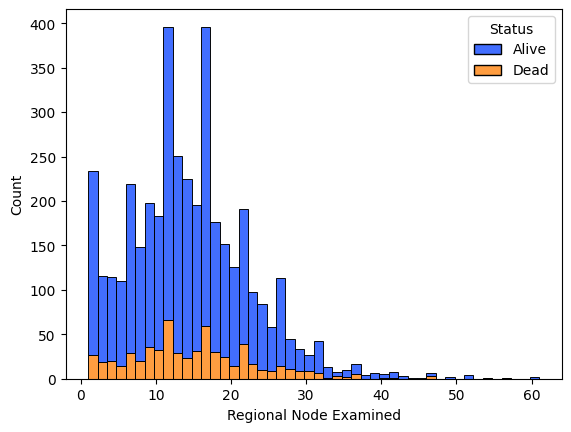

Reginol Node Positive


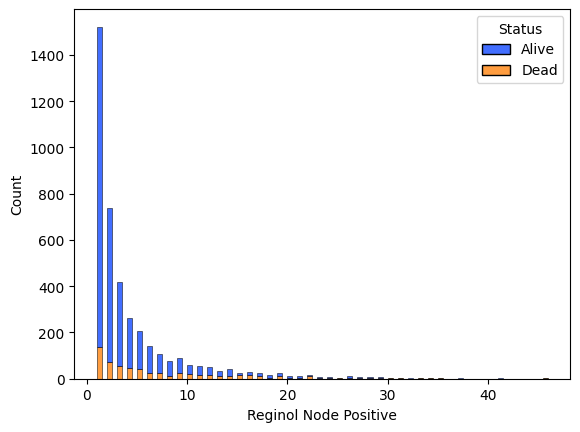

Survival Months


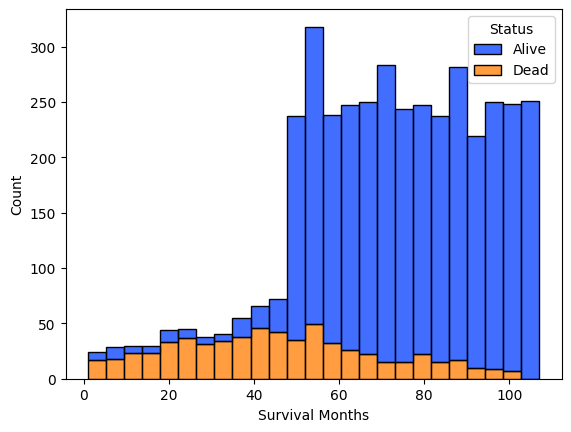

Status


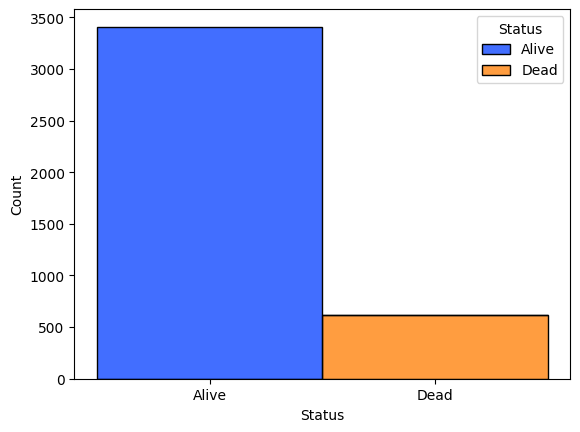

In [10]:
features = bc.columns.tolist()

def plot_hist(bc, features):
    for feature in features:
        sns.histplot(x=feature, data=bc, hue='Status', multiple="stack" , palette='bright' )
        print(feature)
        plt.show()

plot_hist(bc,features)

The graphs above are all the features of the dataset visualized based on the 2 label values.

# T categories for breast cancer
T followed by a number from 0 to 4 describes the main (primary) tumor's size and if it has spread to the skin or to the chest wall under the breast. Higher T numbers mean a larger tumor and/or wider spread to tissues near the breast.

TX: Primary tumor cannot be assessed.

T0: No evidence of primary tumor.

T1 (includes T1a, T1b, and T1c): Tumor is 2 cm (3/4 of an inch) or less across.

T2: Tumor is more than 2 cm but not more than 5 cm (2 inches) across.

T3: Tumor is more than 5 cm across.

T4 (includes T4a, T4b, T4c, and T4d): Tumor of any size growing into the chest wall or skin. This includes inflammatory breast cancer.

# N categories for breast cancer
N followed by a number from 0 to 3 indicates whether the cancer has spread to lymph nodes near the breast and, if so, how many lymph nodes are involved.

Lymph node staging for breast cancer is based on how the nodes look under the microscope, and has changed as technology has gotten better. Newer methods have made it possible to find smaller and smaller groups of cancer cells, but experts haven't been sure how much these tiny deposits of cancer cells influence outlook.

It’s not yet clear how much cancer in the lymph node is needed to see a change in outlook or treatment. This is still being studied, but for now, a deposit of cancer cells must contain at least 200 cells or be at least 0.2 mm across (less than 1/100 of an inch) for it to change the N stage. An area of cancer spread that is smaller than 0.2 mm (or fewer than 200 cells) doesn't change the stage, but is recorded with abbreviations (i+ or mol+) that indicate the type of special test used to find the spread.

If the area of cancer spread is at least 0.2 mm (or 200 cells), but still not larger than 2 mm, it is called a micrometastasis (one mm is about the size of the width of a grain of rice). Micrometastases are counted only if there aren't any larger areas of cancer spread. Areas of cancer spread larger than 2 mm are known to influence outlook and do change the N stage. These larger areas are sometimes called macrometastases, but are more often just called metastases.

NX: Nearby lymph nodes cannot be assessed (for example, if they were removed previously).

N0: Cancer has not spread to nearby lymph nodes.

N1: Cancer has spread to 1 to 3 axillary (underarm) lymph node(s), and/or cancer is found in internal mammary lymph nodes (those near the breast bone) on sentinel lymph node biopsy.

N2: Cancer has spread to 4 to 9 lymph nodes under the arm, or cancer has enlarged the internal mammary lymph nodes

N3: in the breast cancer registry data indicates an advanced stage of cancer where the cancer has spread to a large number of lymph nodes close to the breast. This is generally known as node-positive lymphoma.
There are three subtypes for N3: N3a , N3b , N3c

# 6th Stage categories for breast cancer
The American Joint Committee on Cancer (AJCC) staging system is a standardized system for classifying and staging cancers. The sixth edition of this system, which is the one currently in use, is used to stage breast cancer. In this system, the stages of breast cancer are defined as follows:
Stage 0	See discussion on Tis.

Stage I

Stage IIA	T0 N1 M0 is missing for EOD and included for CS; this affects a very small number of cases.

Stage IIB

Stage IIINOS	Not an AJCC stage but a placeholder in that there is enough information to know that it is stage III but not enough information to code to the specific sub-group. This group is not consistent between EOD and CS.

Stage IIIA	T0 N2 M0 is missing for EOD and included for CS; this affects a very small number of cases.

Stage IIIB

Stage IIIC	Artificial increase in IIIC due to distant nodes (M1) moved to N3 (Stage IIIC when no other mets) for consistency with EOD over time.

Stage IV	Stage IV will be slightly lower than the derived AJCC 6th ed stage since all of the distant lymph nodes were moved to N3 for consistency with EOD over time.

NA	Not an AJCC category but designates the histologies that AJCC does not stage. For example, sarcomas are excluded.

Unk Stage	Cases that do not have enough information to be staged.
The data recorded in Section 6th Stage are IIA, IIB, IIIA, IIIC, IIIB.

# GRADE
Field Description: Grading and differentiation codes of 1-4, 9 are defined in ICD-O-2; 1992. Grade information may be incomplete for cases diagnosed before 1977. In the early 1980’s, additional codes specifying T-cell, B-cell, or null cell involvement in lymphomas and leukemias (histologies M9590-9940) were introduced by SEER. Because the reporting requirements and medical terminology have changed over time, care should be exercised when analyzing this information.

1 : Grade I; grade i; grade 1; well differentiated; differentiated, NOS

2 :Grade II; grade ii; grade 2; moderately differentiated; moderately differentiated; intermediate differentiation

3 : Grade III; grade iii; grade 3; poorly differentiated; differentiated

4 : Grade IV; grade iv; grade 4; undifferentiated; anaplastic

# According to the above information, this is the encoding of ordinal features.

resource :

https://seer.cancer.gov/seerstat/variables/seer/ajcc-stage/6th/breast.html#stage

https://www.cancer.org/cancer/types/breast-cancer/understanding-a-breast-cancer-diagnosis/stages-of-breast-cancer.html

In [11]:
# Before encoding, we take a look at the specific values of the dataset columns

"""defent between set() and unique for retern value of column 
set only returns values, but unic also returns data values"""

def unique_values(dataframe):
    unique_values_dict = {}
    for column in dataframe.columns:
        unique_values_dict[column] = set(dataframe[column])
    return unique_values_dict

print(unique_values(pd.DataFrame(bc)))

{'Age': {30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}, 'Race': {'Black', 'White', 'Other'}, 'Marital Status': {'Separated', 'Married', 'Widowed', 'Single ', 'Divorced'}, 'Tumor Stage': {'T3', 'T1', 'T4', 'T2'}, 'Node Stage': {'N1', 'N2', 'N3'}, '6th Stage': {'IIB', 'IIIB', 'IIA', 'IIIC', 'IIIA'}, 'differentiate': {'Moderately differentiated', 'Undifferentiated', 'Well differentiated', 'Poorly differentiated'}, 'Grade': {'3', ' anaplastic; Grade IV', '1', '2'}, 'Advanced Stage': {'Regional', 'Distant'}, 'Tumor Size': {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 94, 95, 96, 97,

Given the unique values of each column, we find that there is an inconsistency in column Grade that needs to be fixed.  
According to the information given about the values of the characteristic X, we understand that it should be 'anaplastic; Grade IV' should be changed to '4'

In [12]:
bc['Grade'] = bc['Grade'].replace({' anaplastic; Grade IV': '4'})
set(bc['Grade'])

{'1', '2', '3', '4'}

In [13]:
# ordinal feature encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

"""
What is the Difference between OrdinalEncoder and LabelEncoder ?
Answer: OrdinalEncoder preserves the ordinal relationship between categories by assigning them ordinal integer values, while LabelEncoder simply assigns unique integer labels to each category without considering any order.
OrdinalEncoder and LabelEncoder are both preprocessing techniques used to encode categorical variables into numerical representations. However, they differ in their approach and use cases.
Example:
OrdinalEncoder can be used to encode temperature categories (cold, warm, hot) as 0, 1, 2, preserving their order.
LabelEncoder can be used to encode color categories (red, blue, green) as 0, 1, and 2, without considering any order.
"""

bc1 = bc.copy()

T_order = [['T1', 'T2', 'T3', 'T4']]
N_order = [['N1', 'N2', 'N3']]
Sixth_order = [['IIA', 'IIB', 'IIIA' , 'IIIB', 'IIIC']]
G_order = [['1', '2' , '3' ,'4']]

ordinal_encoder_T = OrdinalEncoder(categories=T_order)
ordinal_encoder_N = OrdinalEncoder(categories=N_order)
ordinal_encoder_S = OrdinalEncoder(categories=Sixth_order)
ordinal_encoder_G = OrdinalEncoder(categories=G_order)

bc1[bc1.columns[3]] = ordinal_encoder_T.fit_transform(bc1[[bc1.columns[3]]])
bc1[bc1.columns[4]] = ordinal_encoder_N.fit_transform(bc1[[bc1.columns[4]]])
bc1[bc1.columns[5]] = ordinal_encoder_S.fit_transform(bc1[[bc1.columns[5]]])
bc1[bc1.columns[7]] = ordinal_encoder_G.fit_transform(bc1[[bc1.columns[7]]])

# rest of the encodeing features

le = LabelEncoder()
bc1['Race'] = le.fit_transform(bc1['Race'])
bc1['Marital Status'] = le.fit_transform(bc1['Marital Status'])
bc1['differentiate'] = le.fit_transform(bc1['differentiate'])
bc1['Advanced Stage'] = le.fit_transform(bc1['Advanced Stage'])
bc1['Estrogen Status'] = le.fit_transform(bc1['Estrogen Status'])
bc1['Progesterone Status'] = le.fit_transform(bc1['Progesterone Status'])
bc1['Status'] = le.fit_transform(bc1['Status']) 
print('Alive is 0 and Dead is 1')

bc1

Alive is 0 and Dead is 1


,Age,Race,Marital Status,Tumor Stage,Node Stage,6th Stage,differentiate,Grade,Advanced Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0.0,0.0,0.0,1,2.0,1,4,1,1,24,1,60,0
1,50,2,1,1.0,1.0,2.0,0,1.0,1,35,1,1,14,5,62,0
2,58,2,0,2.0,2.0,4.0,0,1.0,1,63,1,1,14,7,75,0
3,58,2,1,0.0,0.0,0.0,1,2.0,1,18,1,1,2,1,84,0
4,47,2,1,1.0,0.0,1.0,1,2.0,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0.0,0.0,0.0,0,1.0,1,9,1,1,1,1,49,0
4020,56,2,0,1.0,1.0,2.0,0,1.0,1,46,1,1,14,8,69,0
4021,68,2,1,1.0,0.0,1.0,0,1.0,1,22,1,0,11,3,69,0
4022,58,0,0,1.0,0.0,1.0,0,1.0,1,44,1,1,11,1,72,0


# Noramalize

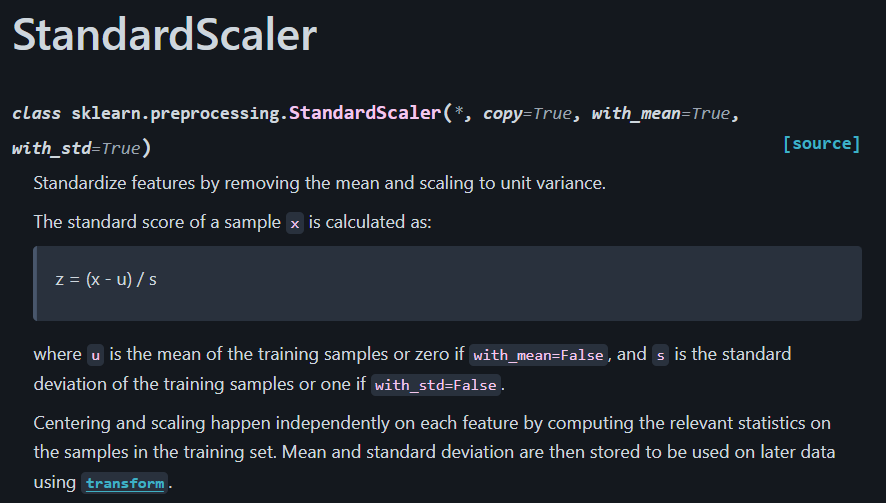

StandardScaler from the sklearn.preprocessing library performs normalization with the Z-score method.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [14]:
from sklearn.preprocessing import StandardScaler


x = bc1.drop('Status', axis=1)
y = bc1['Status'] # y is label

x = np.array(x)
y = np.array(y)

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.56525337,  0.39715987, -0.34910251, ...,  1.19067633,
        -0.61817175, -0.4929608 ],
       [-0.44322226,  0.39715987, -0.34910251, ..., -0.04409458,
         0.16480688, -0.40569537],
       [ 0.44943358,  0.39715987, -1.28938932, ..., -0.04409458,
         0.5562962 ,  0.16152997],
       ...,
       [ 1.56525337,  0.39715987, -0.34910251, ..., -0.41452585,
        -0.22668243, -0.10026634],
       [ 0.44943358, -3.14645727, -1.28938932, ..., -0.41452585,
        -0.61817175,  0.03063182],
       [-0.88955017,  0.39715987, -0.34910251, ..., -0.90843421,
        -0.42242709,  1.25234793]])

# Train / Test

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1 , random_state=42)

print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(3621, 15) (3621,)
(403, 15) (403,)


# Classification

# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(x_train,y_train)

GaussianNB()

In [17]:
y_pred_train_nb = model_nb.predict(x_train)
y_pred_test_nb = model_nb.predict(x_test)

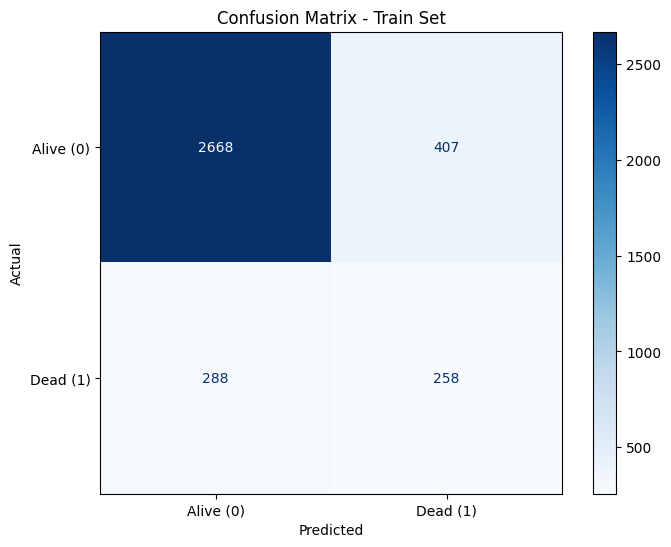

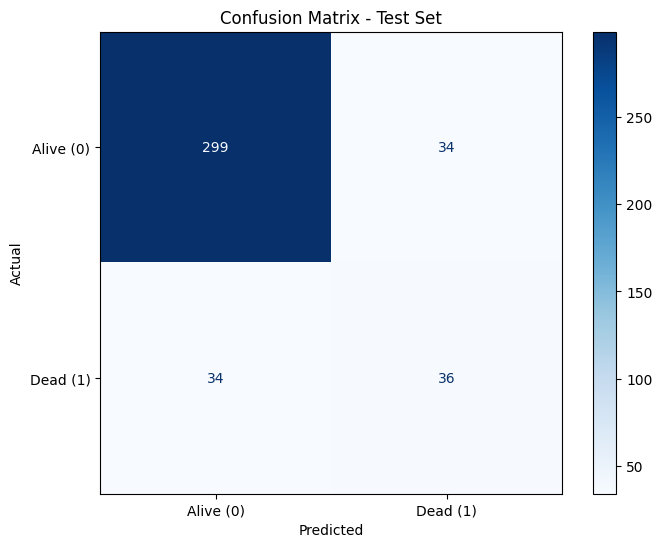

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Replace these with your confusion matrices


# Plot confusion matrix for train set
#print('confusion matrix train :','\n',confusion_matrix(y_train , y_pred_train_nb))
plt.figure(figsize=(8, 6))
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train , y_pred_train_nb), display_labels=["Alive (0)", "Dead (1)"])
disp_train.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# Plot confusion matrix for test set
#print('confusion matrix test :','\n',confusion_matrix(y_test , y_pred_test_nb))
plt.figure(figsize=(8, 6))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , y_pred_test_nb) , display_labels=["Alive (0)", "Dead (1)"])
disp_test.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



print ('accuracy score train :', accuracy_score(y_true=y_train , y_pred=y_pred_train_nb))
print ('accuracy score test :', accuracy_score(y_true=y_test , y_pred=y_pred_test_nb))

print ('precision score train :', precision_score(y_train , y_pred_train_nb))
print ('precision score test :', precision_score(y_test , y_pred_test_nb))

print ('recall score train :', recall_score(y_train , y_pred_train_nb))
print ('recall score test :', recall_score(y_test , y_pred_test_nb))

print('f1 score train : ',f1_score(y_train , y_pred_train_nb))
print('f1 score test : ',f1_score(y_test , y_pred_test_nb))

accuracy score train : 0.808064070698702
accuracy score test : 0.8312655086848635
precision score train : 0.3879699248120301
precision score test : 0.5142857142857142
recall score train : 0.4725274725274725
recall score test : 0.5142857142857142
f1 score train :  0.42609413707679605
f1 score test :  0.5142857142857142


# k-nearest neighbors 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train ,y_train)

y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

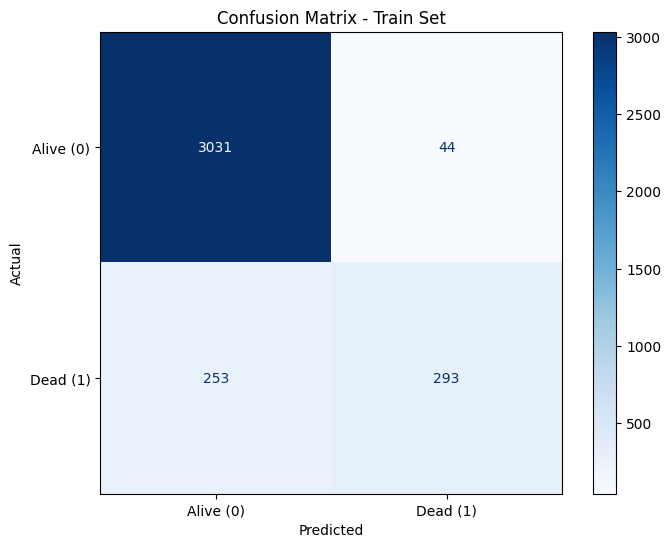

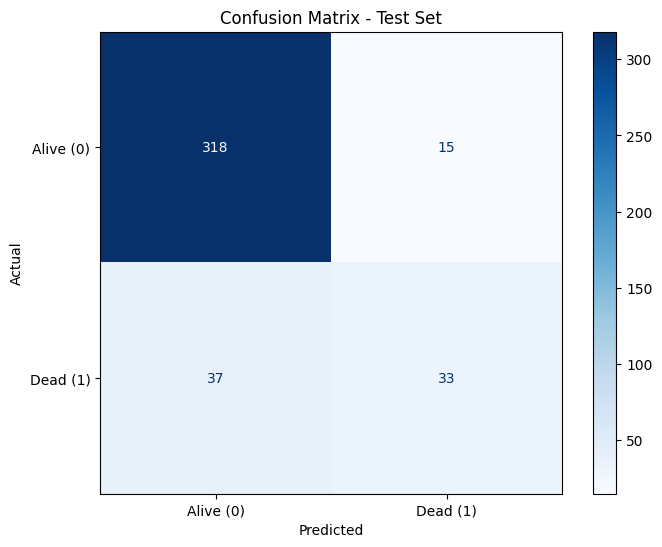

accuracy score train : 0.9179784589892295
accuracy score test : 0.8709677419354839
precision score train : 0.8694362017804155
precision score test : 0.6875
recall score train : 0.5366300366300366
recall score test : 0.4714285714285714
f1 score train :  0.6636466591166478
f1 score test :  0.559322033898305


In [21]:
# Plot confusion matrix for train set
#print('confusion matrix train :','\n',confusion_matrix(y_train , y_pred_train_knn))
plt.figure(figsize=(8, 6))
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train , y_pred_train_knn), display_labels=["Alive (0)", "Dead (1)"])
disp_train.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# Plot confusion matrix for test set
#print('confusion matrix test :','\n',confusion_matrix(y_test , y_pred_test_knn))
plt.figure(figsize=(8, 6))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , y_pred_test_knn) , display_labels=["Alive (0)", "Dead (1)"])
disp_test.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

print ('accuracy score train :', accuracy_score(y_train , y_pred_train_knn))
print ('accuracy score test :', accuracy_score(y_test , y_pred_test_knn))

print ('precision score train :', precision_score(y_train , y_pred_train_knn))
print ('precision score test :', precision_score(y_test , y_pred_test_knn))

print ('recall score train :', recall_score(y_train , y_pred_train_knn))
print ('recall score test :', recall_score(y_test , y_pred_test_knn))

print('f1 score train : ',f1_score(y_train , y_pred_train_knn))
print('f1 score test : ',f1_score(y_test , y_pred_test_knn))

# Decision Tree

[Text(0.46947115384615384, 0.9375, 'x[14] <= -1.038\ngini = 0.256\nsamples = 3621\nvalue = [3075, 546]'),
 Text(0.2389423076923077, 0.8125, 'x[0] <= 0.84\ngini = 0.415\nsamples = 419\nvalue = [123, 296]'),
 Text(0.14711538461538462, 0.6875, 'x[11] <= -0.862\ngini = 0.47\nsamples = 307\nvalue = [116.0, 191.0]'),
 Text(0.06923076923076923, 0.5625, 'x[10] <= -1.734\ngini = 0.26\nsamples = 104\nvalue = [16, 88]'),
 Text(0.038461538461538464, 0.4375, 'x[9] <= -0.354\ngini = 0.119\nsamples = 63\nvalue = [4, 59]'),
 Text(0.023076923076923078, 0.3125, 'x[9] <= -0.472\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.015384615384615385, 0.1875, 'x[13] <= 0.85\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.007692307692307693, 0.0625, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.023076923076923078, 0.0625, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.03076923076923077, 0.1875, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.05384615384615385, 0.3125, 'x[12] <= 

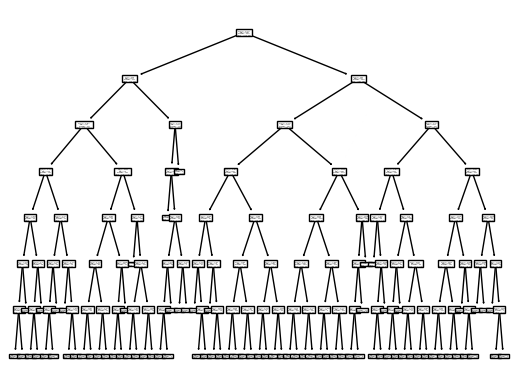

In [22]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

feature_names = bc1.columns
dt = DecisionTreeClassifier(max_depth=7, min_samples_split=3, min_samples_leaf=3)
dt.fit(x_train, y_train)

y_pred_train_dt = dt.predict(x_train)
y_pred_test_dt = dt.predict(x_test)
tree.plot_tree(dt)


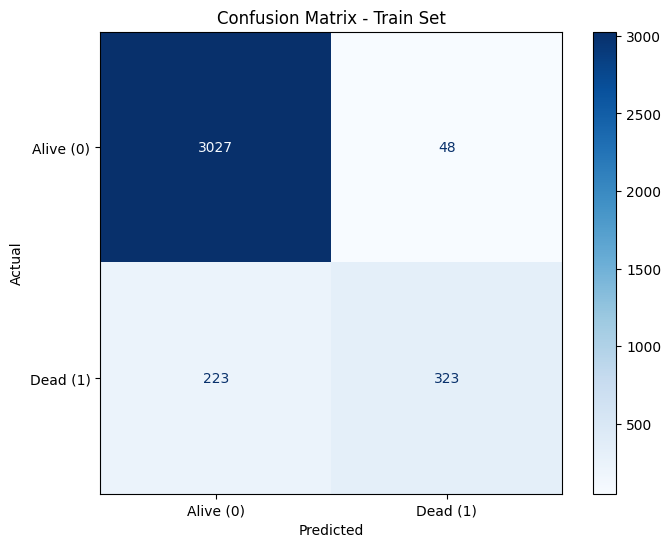

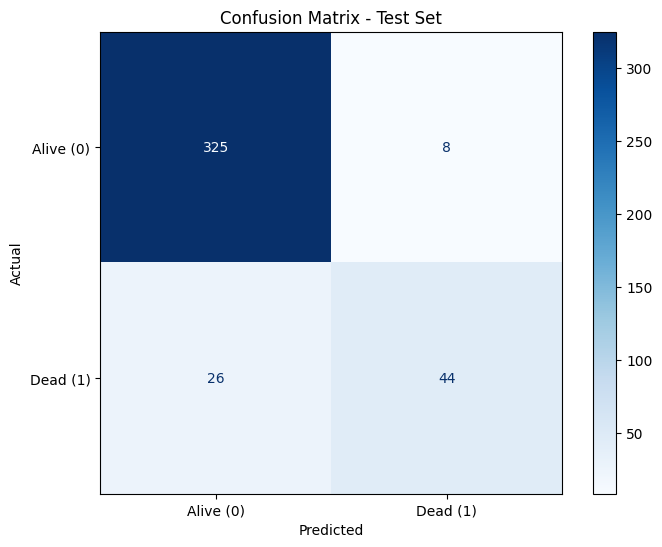

accuracy score train : 0.9251587959127313
accuracy score test : 0.9156327543424317
precision score train : 0.8706199460916442
precision score test : 0.8461538461538461
recall score train : 0.5915750915750916
recall score test : 0.6285714285714286
f1 score train :  0.7044711014176663
f1 score test :  0.7213114754098361


In [23]:
# Plot confusion matrix for train set

#print('confusion matrix train :','\n',confusion_matrix(y_train , y_pred_train_dt))
plt.figure(figsize=(8, 6))
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train , y_pred_train_dt), display_labels=["Alive (0)", "Dead (1)"])
disp_train.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# Plot confusion matrix for test set

#print('confusion matrix test :','\n',confusion_matrix(y_test , y_pred_test_dt))
plt.figure(figsize=(8, 6))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , y_pred_test_dt) , display_labels=["Alive (0)", "Dead (1)"])
disp_test.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

print ('accuracy score train :', accuracy_score(y_train , y_pred_train_dt))
print ('accuracy score test :', accuracy_score(y_test , y_pred_test_dt))

print ('precision score train :', precision_score(y_train , y_pred_train_dt))
print ('precision score test :', precision_score(y_test , y_pred_test_dt))

print ('recall score train :', recall_score(y_train , y_pred_train_dt))
print ('recall score test :', recall_score(y_test , y_pred_test_dt))

print('f1 score train : ',f1_score(y_train , y_pred_train_dt))
print('f1 score test : ',f1_score(y_test , y_pred_test_dt))

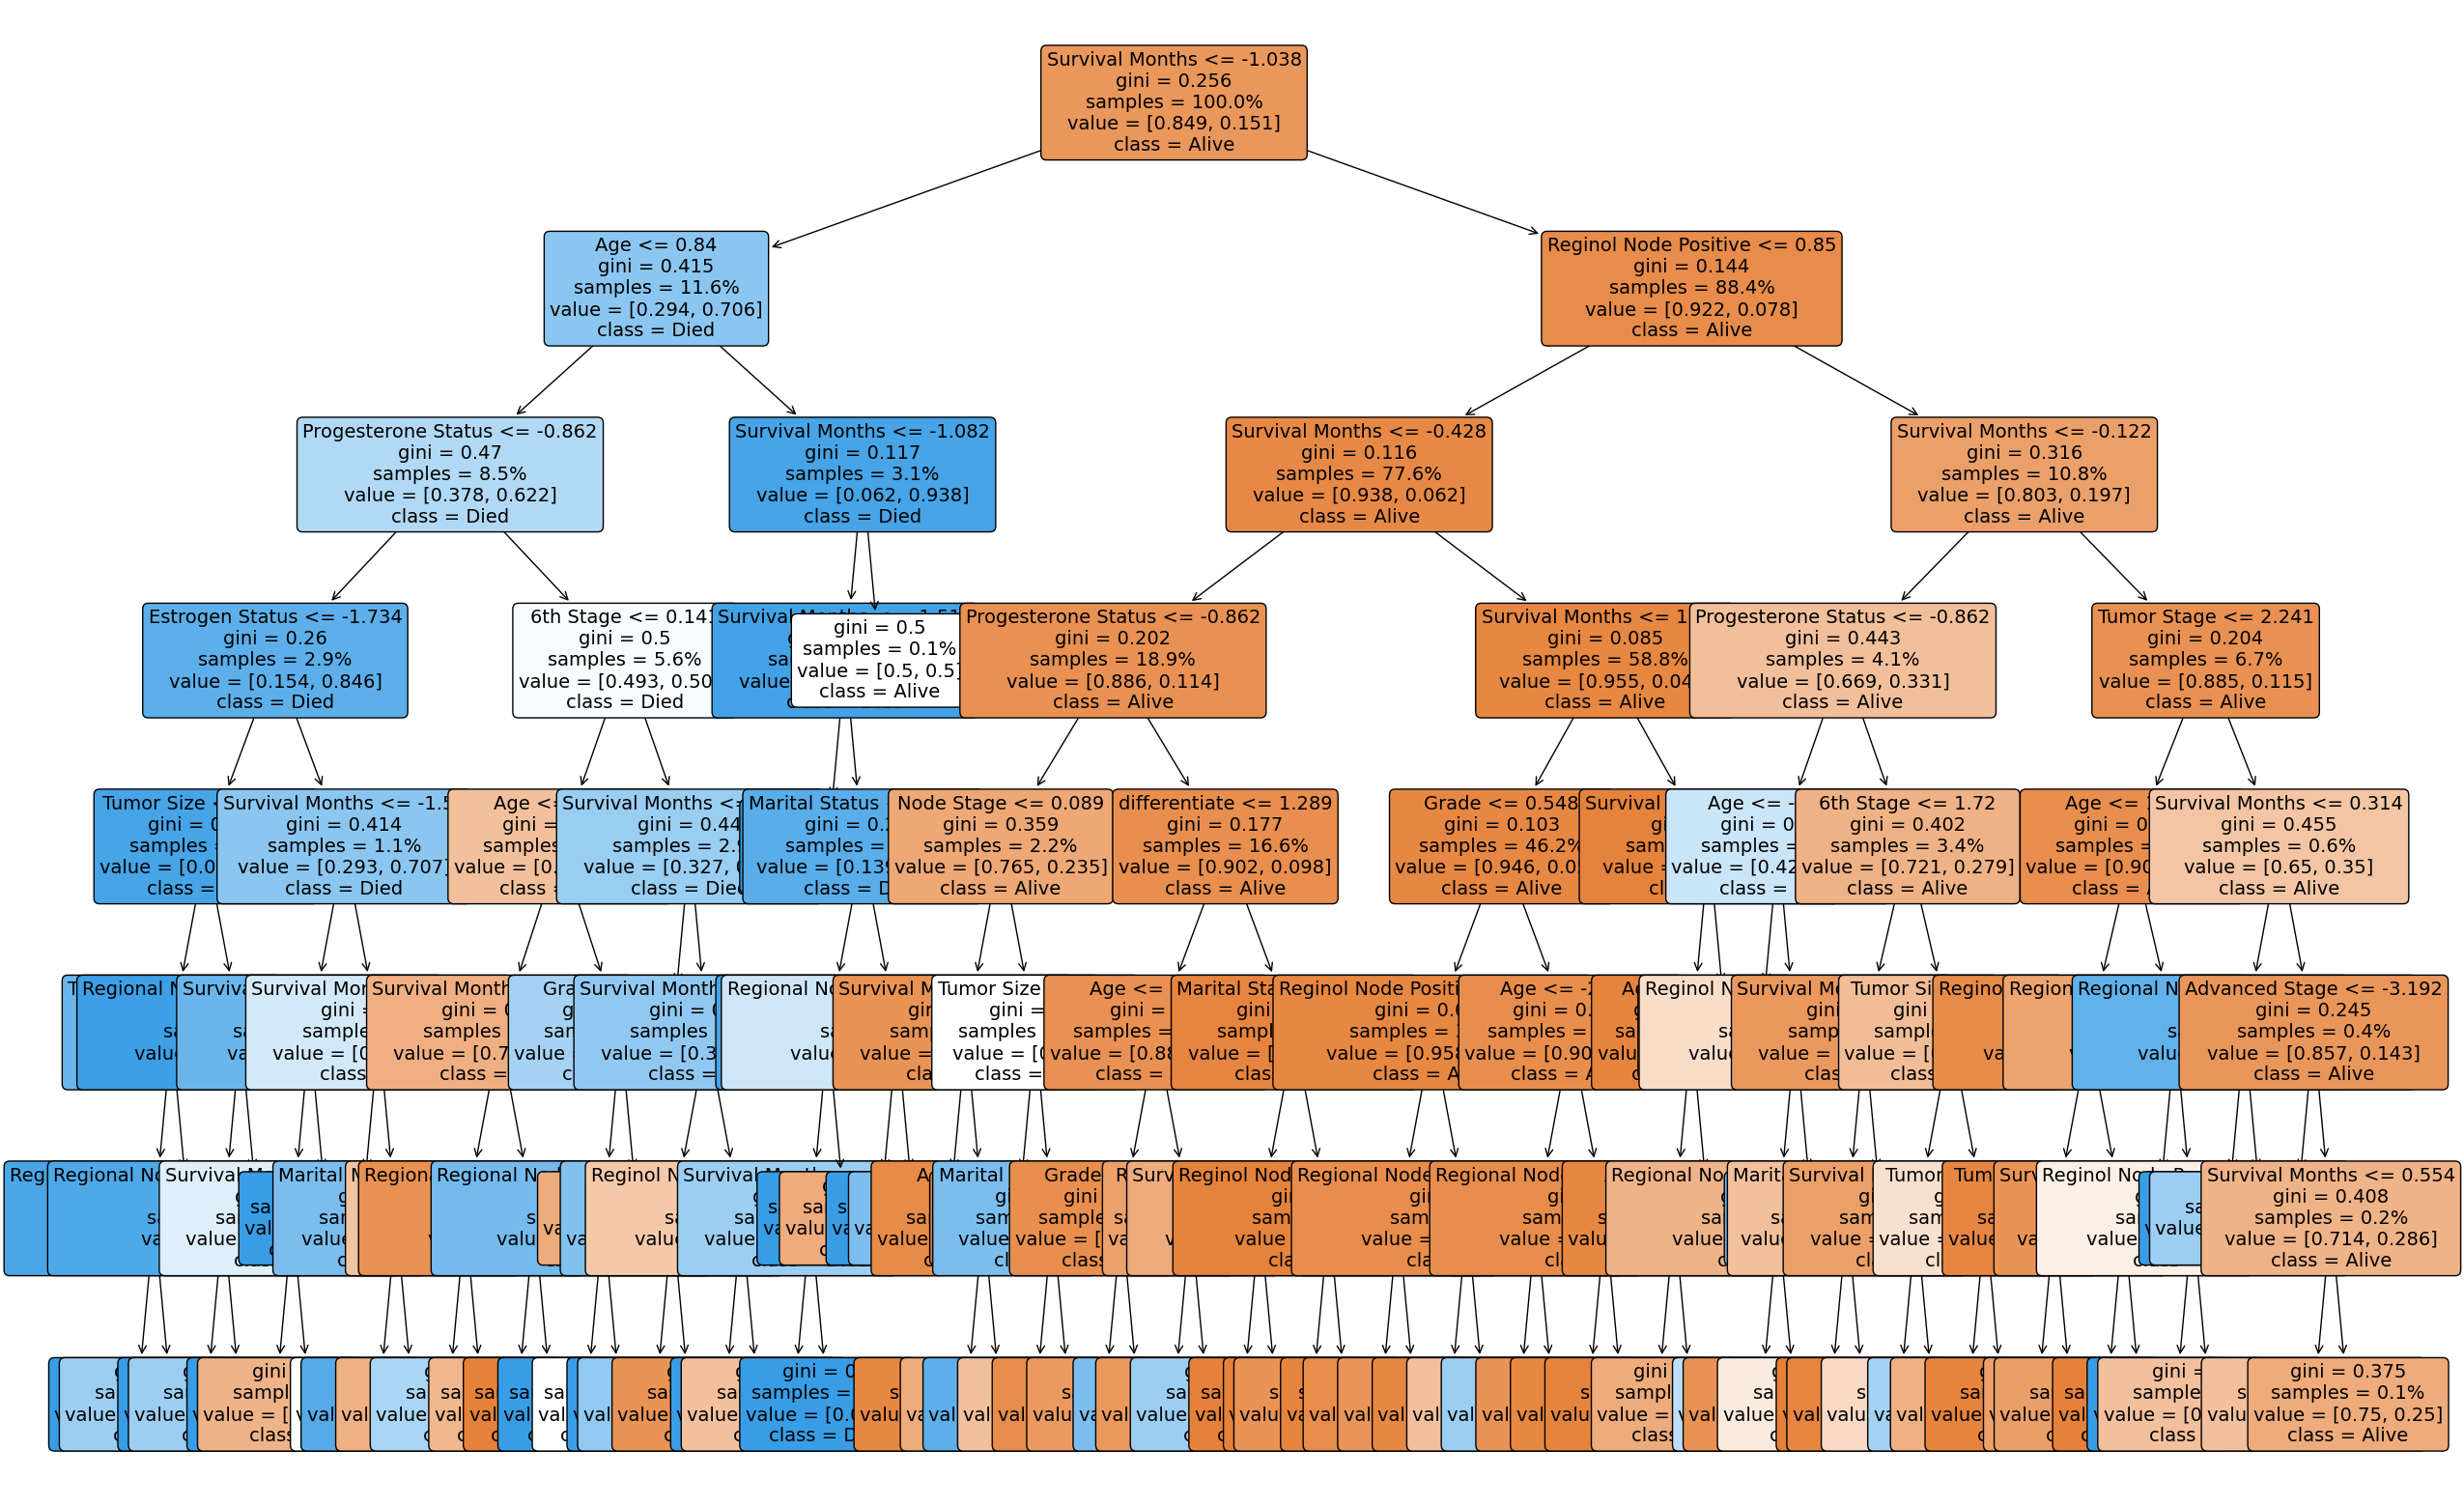

In [24]:
plt.figure(figsize=(30,20))  

tree.plot_tree(dt, 
               filled=True, 
               feature_names=feature_names, 
               class_names=['Alive', 'Died'], 
               rounded=True, 
               fontsize=14, 
               proportion=True)  

plt.savefig('decision_tree.png', dpi=300) 
plt.show()

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100 , max_depth=8)
rf.fit(x_train, y_train)

y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

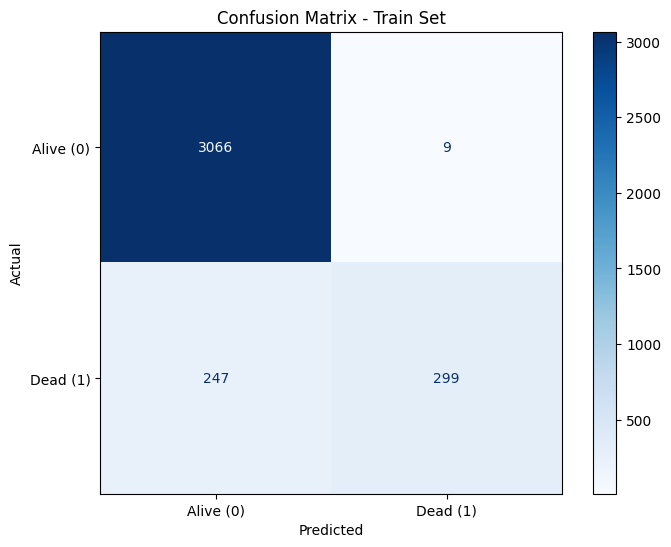

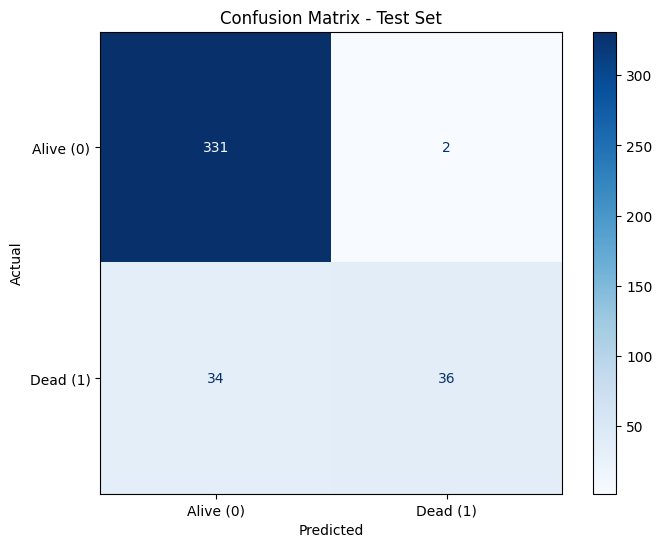

accuracy score train : 0.9293012979839823
accuracy score test : 0.9106699751861043
precision score train : 0.9707792207792207
precision score test : 0.9473684210526315
recall score train : 0.5476190476190477
recall score test : 0.5142857142857142
f1 score train :  0.7002341920374707
f1 score test :  0.6666666666666666


In [26]:
# Plot confusion matrix for train set

#print('confusion matrix train :','\n',confusion_matrix(y_train , y_pred_train_rf))
plt.figure(figsize=(8, 6))
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train , y_pred_train_rf), display_labels=["Alive (0)", "Dead (1)"])
disp_train.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# Plot confusion matrix for test set

#print('confusion matrix test :','\n',confusion_matrix(y_test , y_pred_test_rf))
plt.figure(figsize=(8, 6))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , y_pred_test_rf) , display_labels=["Alive (0)", "Dead (1)"])
disp_test.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

print ('accuracy score train :', accuracy_score(y_train , y_pred_train_rf))
print ('accuracy score test :', accuracy_score(y_test , y_pred_test_rf))

print ('precision score train :', precision_score(y_train , y_pred_train_rf))
print ('precision score test :', precision_score(y_test , y_pred_test_rf))

print ('recall score train :', recall_score(y_train , y_pred_train_rf))
print ('recall score test :', recall_score(y_test , y_pred_test_rf))

print('f1 score train : ',f1_score(y_train , y_pred_train_rf))
print('f1 score test : ',f1_score(y_test , y_pred_test_rf))

# SVM

SVM with linear kernel 


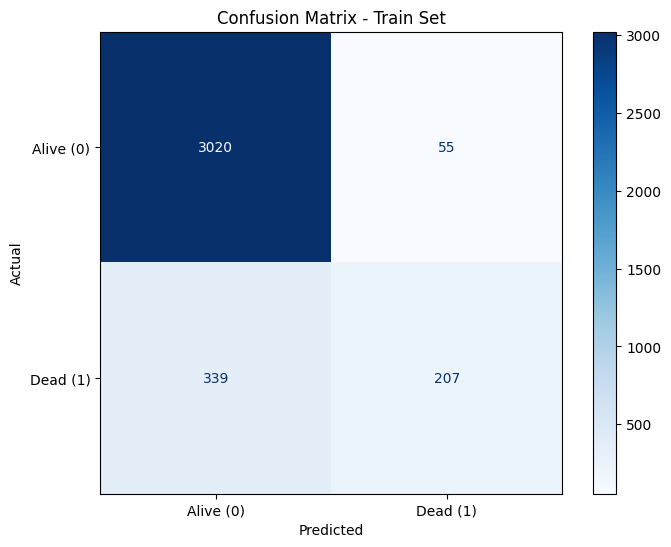

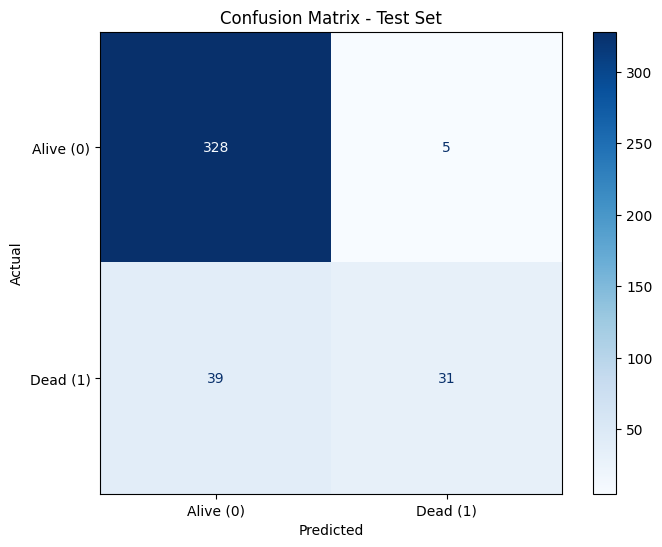

accuracy score train for linear kernel : 0.8911902789284728
accuracy score test for linear kernel : 0.890818858560794
precision score train for linear kernel: 0.7900763358778626
precision score test for linear kernel: 0.8611111111111112
recall score train for linear kernel: 0.3791208791208791
recall score test for linear kernel: 0.44285714285714284
f1 score score train for linear kernel: 0.5123762376237624
f1 score score test for linear kernel: 0.5849056603773585
SVM with poly kernel 


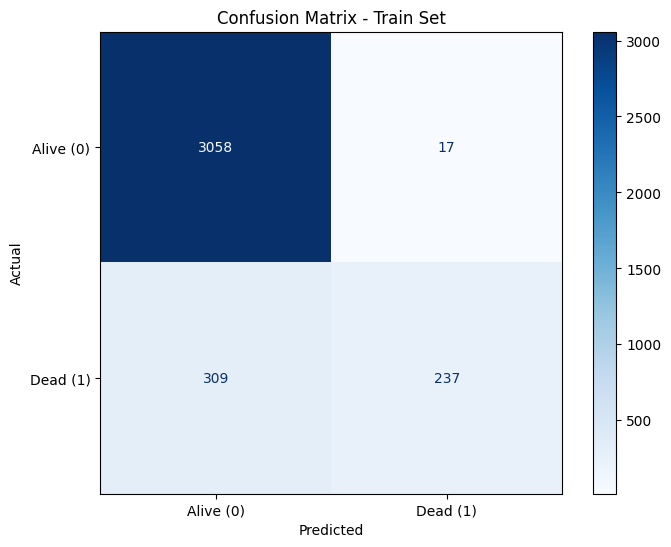

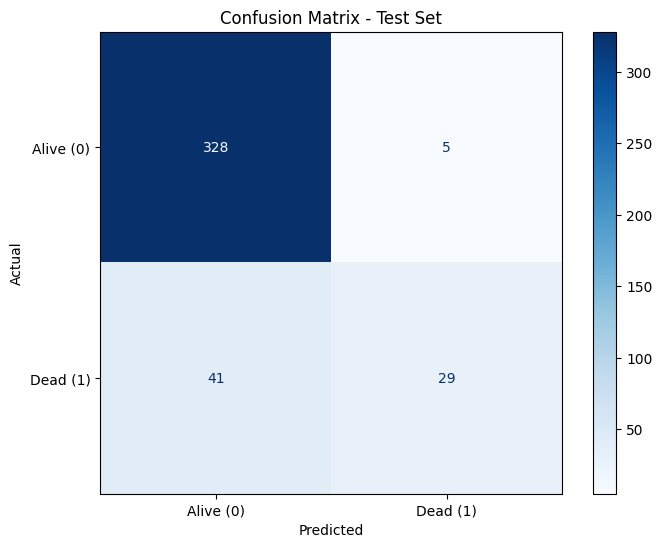

accuracy score train for poly kernel : 0.9099696216514775
accuracy score test for poly kernel : 0.8858560794044665
precision score train for poly kernel: 0.9330708661417323
precision score test for poly kernel: 0.8529411764705882
recall score train for poly kernel: 0.4340659340659341
recall score test for poly kernel: 0.4142857142857143
f1 score score train for poly kernel: 0.5925
f1 score score test for poly kernel: 0.5576923076923077
SVM with rbf kernel 


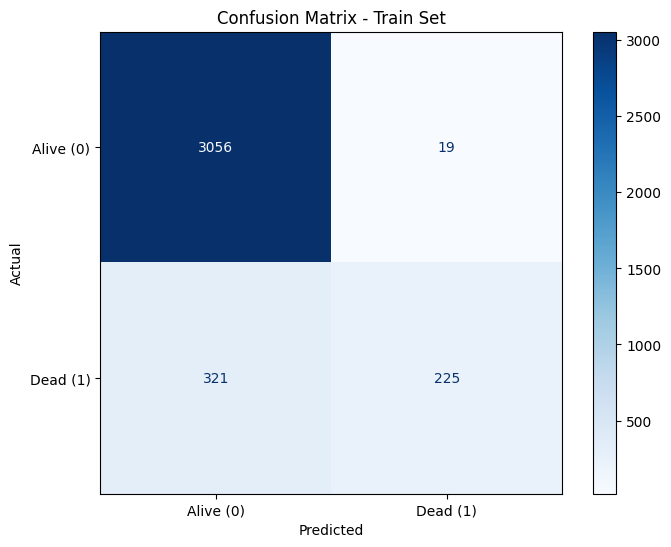

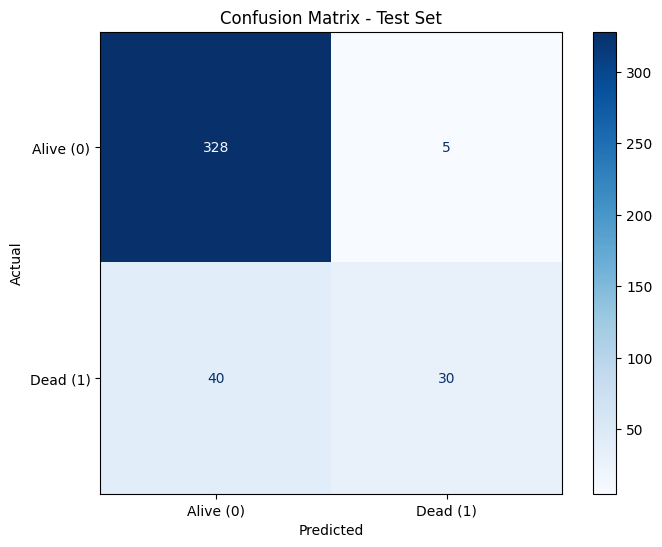

accuracy score train for rbf kernel : 0.9061032863849765
accuracy score test for rbf kernel : 0.8883374689826302
precision score train for rbf kernel: 0.9221311475409836
precision score test for rbf kernel: 0.8571428571428571
recall score train for rbf kernel: 0.41208791208791207
recall score test for rbf kernel: 0.42857142857142855
f1 score score train for rbf kernel: 0.569620253164557
f1 score score test for rbf kernel: 0.5714285714285714
SVM with sigmoid kernel 


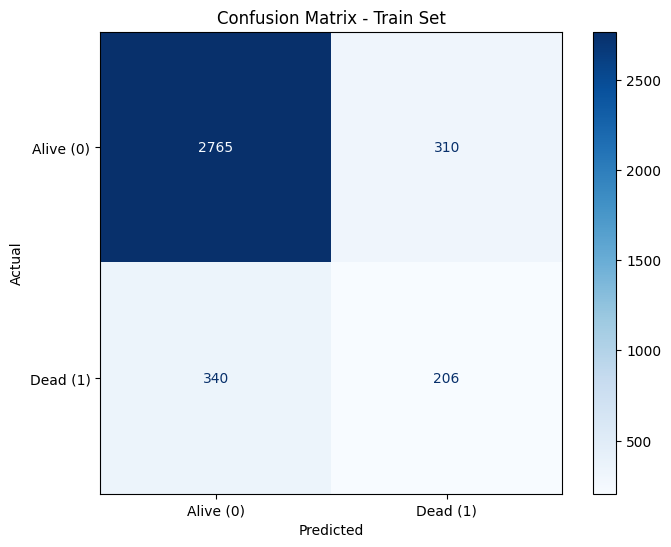

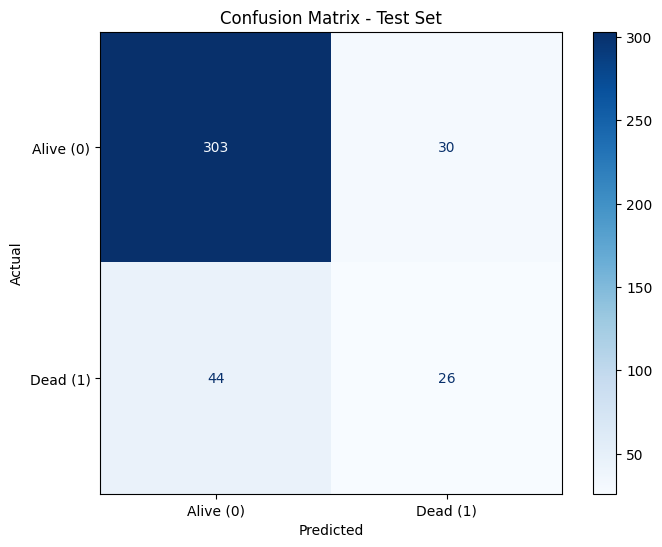

accuracy score train for sigmoid kernel : 0.8204915769124551
accuracy score test for sigmoid kernel : 0.8163771712158809
precision score train for sigmoid kernel: 0.3992248062015504
precision score test for sigmoid kernel: 0.4642857142857143
recall score train for sigmoid kernel: 0.3772893772893773
recall score test for sigmoid kernel: 0.37142857142857144
f1 score score train for sigmoid kernel: 0.3879472693032015
f1 score score test for sigmoid kernel: 0.4126984126984127


In [27]:
from sklearn import svm

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm_model = svm.SVC(kernel=kernel)
    svm_model.fit(x_train, y_train)
    #y_pred = svm_model.predict(x_test)

    #svm_model = svm.SVC(kernel='sigmoid')

    #svm_model.fit(x_train , y_train)

    y_pred_train_svm = svm_model.predict(x_train)
    y_pred_test_svm = svm_model.predict(x_test)

    print ('SVM with {} kernel '.format(kernel))
    # Plot confusion matrix for train set

    #print('confusion matrix train :','\n',confusion_matrix(y_train , y_pred_train_svm))
    plt.figure(figsize=(8, 6))
    disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train , y_pred_train_svm), display_labels=["Alive (0)", "Dead (1)"])
    disp_train.plot(cmap='Blues', ax=plt.gca())
    plt.title("Confusion Matrix - Train Set")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.grid(False)
    plt.show()

    # Plot confusion matrix for test set

    #print('confusion matrix test :','\n',confusion_matrix(y_test , y_pred_test_svm))
    plt.figure(figsize=(8, 6))
    disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , y_pred_test_svm) , display_labels=["Alive (0)", "Dead (1)"])
    disp_test.plot(cmap='Blues', ax=plt.gca())
    plt.title("Confusion Matrix - Test Set")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.grid(False)
    plt.show()

    print ('accuracy score train for {} kernel :'.format(kernel),accuracy_score(y_train , y_pred_train_svm))
    print ('accuracy score test for {} kernel :'.format(kernel),accuracy_score(y_test , y_pred_test_svm))

    print ('precision score train for {} kernel:'.format(kernel), precision_score(y_train , y_pred_train_svm))
    print ('precision score test for {} kernel:'.format(kernel),precision_score(y_test , y_pred_test_svm))

    print ('recall score train for {} kernel:'.format(kernel), recall_score(y_train , y_pred_train_svm))
    print ('recall score test for {} kernel:'.format(kernel),recall_score(y_test , y_pred_test_svm))

    print ('f1 score score train for {} kernel:'.format(kernel), f1_score(y_train , y_pred_train_svm))
    print ('f1 score score test for {} kernel:'.format(kernel),f1_score(y_test , y_pred_test_svm))

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(x_train , y_train)

y_pred_train_LR = model_LR.predict(x_train)
y_pred_test_LR = model_LR.predict(x_test)

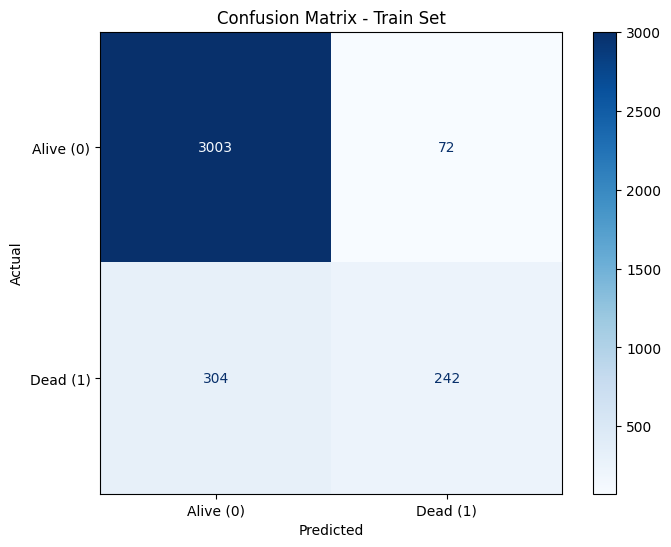

confusion matrix test : 
 [[328   5]
 [ 35  35]]
[[328   5]
 [ 35  35]]


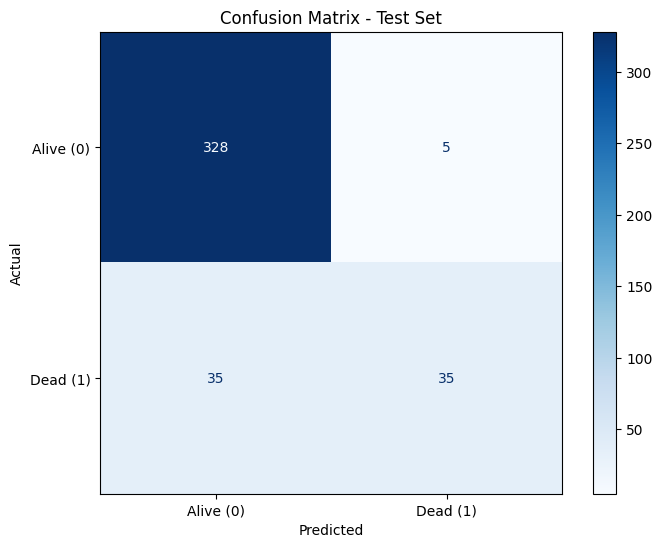

accuracy score train : 0.896161281413974
accuracy score test : 0.9007444168734491
precision score train : 0.7707006369426752
precision score test : 0.875
recall score train : 0.4432234432234432
recall score test : 0.5
f1 score train :  0.5627906976744186
f1 score test :  0.6363636363636364


In [40]:
# Plot confusion matrix for train set

#print('confusion matrix train :','\n',confusion_matrix(y_train , y_pred_train_LR))
plt.figure(figsize=(8, 6))
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train , y_pred_train_LR), display_labels=["Alive (0)", "Dead (1)"])
disp_train.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# Plot confusion matrix for test set

print('confusion matrix test :','\n',confusion_matrix(y_test , y_pred_test_LR))

plt.figure(figsize=(8, 6))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , y_pred_test_LR) , display_labels=["Alive (0)", "Dead (1)"])
disp_test.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

print ('accuracy score train :', accuracy_score(y_train , y_pred_train_LR))
print ('accuracy score test :', accuracy_score(y_test , y_pred_test_LR))

print ('precision score train :', precision_score(y_train , y_pred_train_LR))
print ('precision score test :', precision_score(y_test , y_pred_test_LR))

print ('recall score train :', recall_score(y_train , y_pred_train_LR))
print ('recall score test :', recall_score(y_test , y_pred_test_LR))

print('f1 score train : ',f1_score(y_train , y_pred_train_LR))
print('f1 score test : ',f1_score(y_test , y_pred_test_LR))

# ANN

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_ann = MLPClassifier(hidden_layer_sizes=8, max_iter=300, activation='relu', solver='adam', random_state=42)

model_ann.fit(x_train, y_train)

y_pred_test_ann = model_ann.predict(x_test)
y_pred_train_ann = model_ann.predict(x_train)


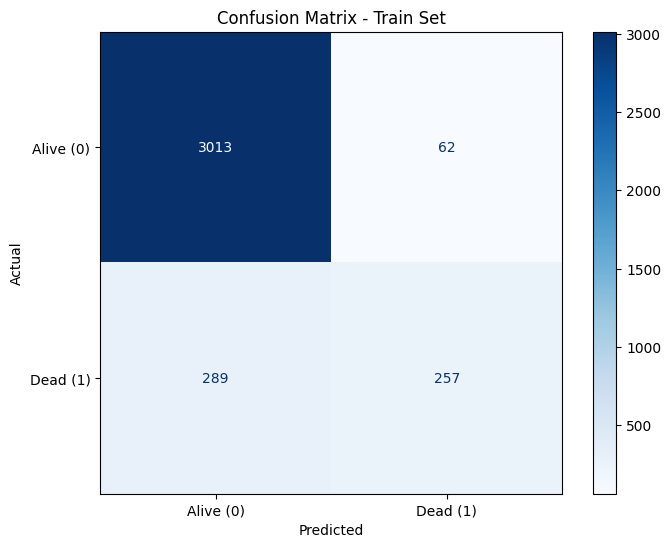

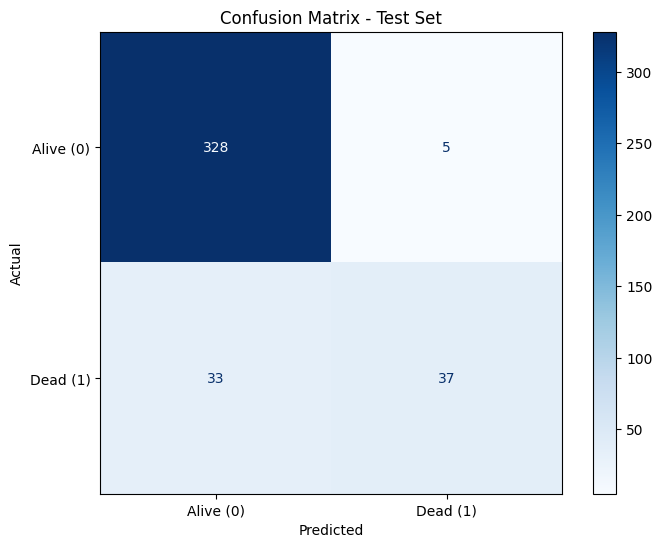

accuracy score train : 0.9030654515327258
accuracy score test : 0.9057071960297767
precision score train : 0.8056426332288401
precision score test : 0.8809523809523809
recall score train : 0.4706959706959707
recall score test : 0.5285714285714286
f1 score train : 0.5942196531791908
f1 score test : 0.6607142857142857


In [31]:
#print('confusion matrix train :','\n',confusion_matrix(y_train , y_pred_train_ann))
plt.figure(figsize=(8, 6))
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train , y_pred_train_ann), display_labels=["Alive (0)", "Dead (1)"])
disp_train.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# Plot confusion matrix for test set

#print('confusion matrix test :','\n',confusion_matrix(y_test , y_pred_test_ann))
plt.figure(figsize=(8, 6))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , y_pred_test_ann) , display_labels=["Alive (0)", "Dead (1)"])
disp_test.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

print('accuracy score train :', accuracy_score(y_train, y_pred_train_ann))
print('accuracy score test :', accuracy_score(y_test, y_pred_test_ann))

print('precision score train :', precision_score(y_train, y_pred_train_ann))
print('precision score test :', precision_score(y_test, y_pred_test_ann))

print('recall score train :', recall_score(y_train, y_pred_train_ann))
print('recall score test :', recall_score(y_test, y_pred_test_ann))

print('f1 score train :', f1_score(y_train, y_pred_train_ann))
print('f1 score test :', f1_score(y_test, y_pred_test_ann))


# Ensemble Learing

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier


estimator = [] 
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('GNB', GaussianNB())) 
estimator.append(('DTC', DecisionTreeClassifier(max_depth=7 , min_samples_split=3 , min_samples_leaf=3))) 

# hard voting

accuracy score train : 0.9049986191659762
accuracy score test : 0.9032258064516129
precision score train : 0.8117283950617284
precision score test : 0.8604651162790697
recall score train : 0.4816849816849817
recall score test : 0.5285714285714286
f1 score train :  0.6045977011494252
f1 score test :  0.6548672566371682


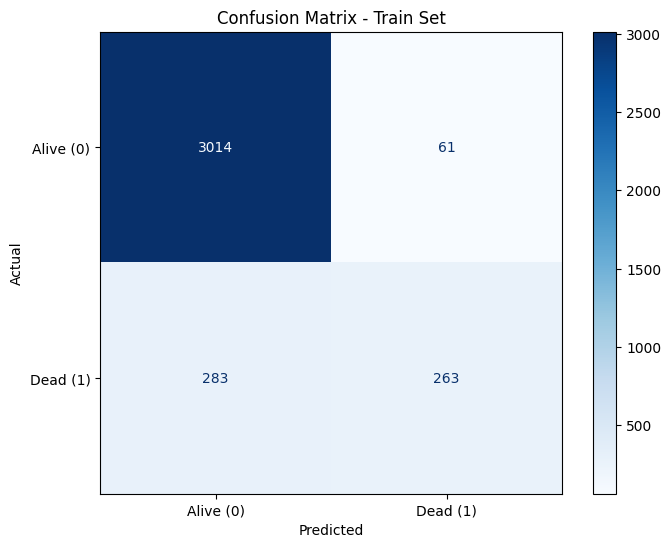

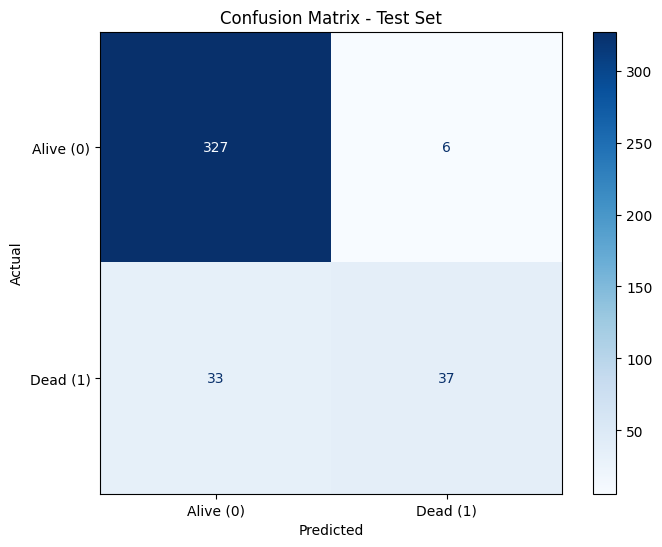

In [33]:
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(x_train, y_train) 
y_pred_train_hard_voting = hard_voting.predict(x_train)  
y_pred_test_hard_voting = hard_voting.predict(x_test)  

print ('accuracy score train :', accuracy_score(y_train , y_pred_train_hard_voting))
print ('accuracy score test :', accuracy_score(y_test , y_pred_test_hard_voting))

print ('precision score train :', precision_score(y_train , y_pred_train_hard_voting))
print ('precision score test :', precision_score(y_test , y_pred_test_hard_voting))

print ('recall score train :', recall_score(y_train , y_pred_train_hard_voting))
print ('recall score test :', recall_score(y_test , y_pred_test_hard_voting))

print('f1 score train : ',f1_score(y_train , y_pred_train_hard_voting))
print('f1 score test : ',f1_score(y_test , y_pred_test_hard_voting))

#print('confusion matrix train :','\n',confusion_matrix(y_train , y_pred_train_hard_voting))
plt.figure(figsize=(8, 6))
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train , y_pred_train_hard_voting), display_labels=["Alive (0)", "Dead (1)"])
disp_train.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# Plot confusion matrix for test set

#print('confusion matrix test :','\n',confusion_matrix(y_test , y_pred_train_hard_voting))
plt.figure(figsize=(8, 6))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , y_pred_test_hard_voting) , display_labels=["Alive (0)", "Dead (1)"])
disp_test.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# soft voting

accuracy score train : 0.9011322838994753
accuracy score test : 0.9081885856079405
precision score train : 0.75
precision score test : 0.8666666666666667
recall score train : 0.5164835164835165
recall score test : 0.5571428571428572
f1 score train :  0.6117136659436009
f1 score test :  0.6782608695652174


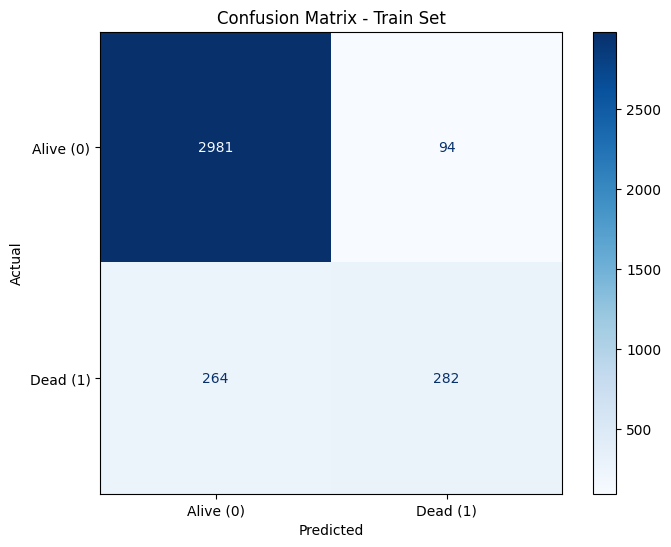

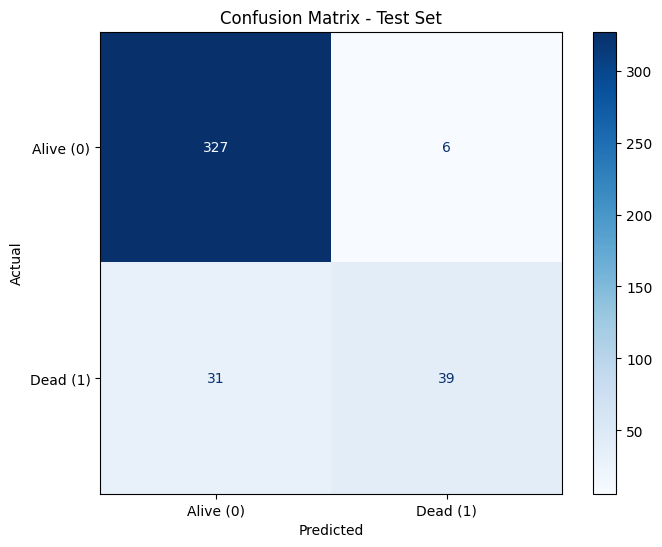

In [34]:
soft_voting = VotingClassifier(estimators = estimator, voting ='soft') 
soft_voting.fit(x_train, y_train) 
y_pred_train_soft_voting = soft_voting.predict(x_train)  
y_pred_test_soft_voting = soft_voting.predict(x_test) 

print ('accuracy score train :', accuracy_score(y_train , y_pred_train_soft_voting))
print ('accuracy score test :', accuracy_score(y_test , y_pred_test_soft_voting))

print ('precision score train :', precision_score(y_train , y_pred_train_soft_voting))
print ('precision score test :', precision_score(y_test , y_pred_test_soft_voting))

print ('recall score train :', recall_score(y_train , y_pred_train_soft_voting))
print ('recall score test :', recall_score(y_test , y_pred_test_soft_voting))

print('f1 score train : ',f1_score(y_train , y_pred_train_soft_voting))
print('f1 score test : ',f1_score(y_test , y_pred_test_soft_voting))

#print('confusion matrix train :','\n',confusion_matrix(y_train , y_pred_train_hard_voting))
plt.figure(figsize=(8, 6))
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train , y_pred_train_soft_voting), display_labels=["Alive (0)", "Dead (1)"])
disp_train.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# Plot confusion matrix for test set

#print('confusion matrix test :','\n',confusion_matrix(y_test , y_pred_train_hard_voting))
plt.figure(figsize=(8, 6))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , y_pred_test_soft_voting) , display_labels=["Alive (0)", "Dead (1)"])
disp_test.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# Stacking Classifier

accuracy score train : 0.9207401270367301
accuracy score test : 0.8982630272952854
precision score train : 0.9608540925266904
precision score test : 0.8717948717948718
recall score train : 0.4945054945054945
recall score test : 0.4857142857142857
f1 score train :  0.652962515114873
f1 score test :  0.6238532110091743


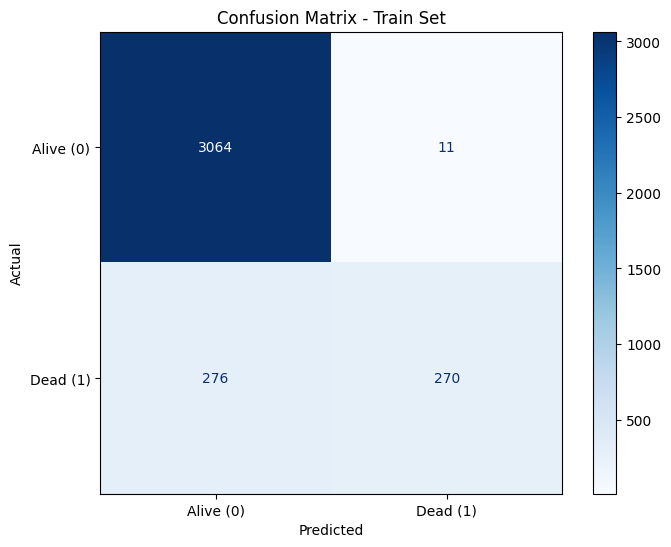

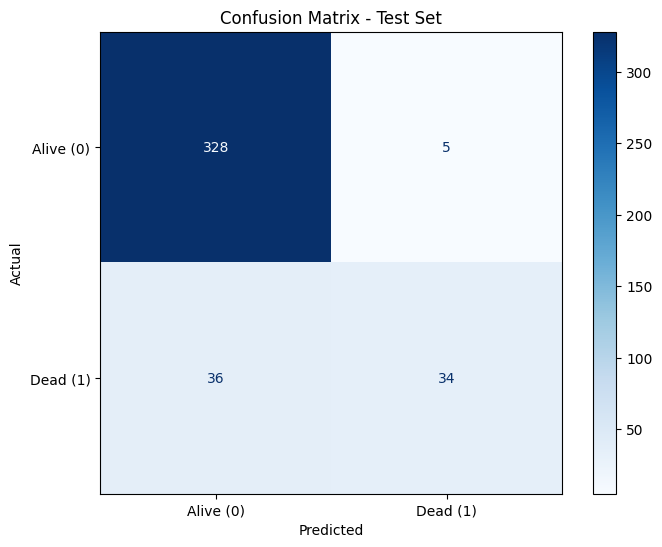

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


estimators = [
    ('svc', SVC(kernel='poly', probability=True)),
    ('dt', DecisionTreeClassifier(max_depth=7 , min_samples_split=3 , min_samples_leaf=3))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

stacking_clf.fit(x_train, y_train)


y_pred_train_stacking_clf = stacking_clf.predict(x_train)
y_pred_test_stacking_clf = stacking_clf.predict(x_test)

print ('accuracy score train :', accuracy_score(y_train , y_pred_train_stacking_clf))
print ('accuracy score test :', accuracy_score(y_test , y_pred_test_stacking_clf))

print ('precision score train :', precision_score(y_train , y_pred_train_stacking_clf))
print ('precision score test :', precision_score(y_test , y_pred_test_stacking_clf))

print ('recall score train :', recall_score(y_train , y_pred_train_stacking_clf))
print ('recall score test :', recall_score(y_test , y_pred_test_stacking_clf))

print('f1 score train : ',f1_score(y_train , y_pred_train_stacking_clf))
print('f1 score test : ',f1_score(y_test , y_pred_test_stacking_clf))

#print('confusion matrix train :','\n',confusion_matrix(y_train , y_pred_train_hard_voting))
plt.figure(figsize=(8, 6))
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train , y_pred_train_stacking_clf), display_labels=["Alive (0)", "Dead (1)"])
disp_train.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()

# Plot confusion matrix for test set

#print('confusion matrix test :','\n',confusion_matrix(y_test , y_pred_train_hard_voting))
plt.figure(figsize=(8, 6))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , y_pred_test_stacking_clf) , display_labels=["Alive (0)", "Dead (1)"])
disp_test.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()


# Random Over Sampling

In [36]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.metrics import classification_report

ros = RandomOverSampler(random_state=101)
X_train_ros, y_train_ros= ros.fit_resample(x_train, y_train)
print(sorted(Counter(y_train_ros).items()))

[(0, 3075), (1, 3075)]


In [37]:
ros_model = rf.fit(X_train_ros, y_train_ros)
y_pred_train_ros = ros_model.predict(x_train)
y_pred_test_ros = ros_model.predict(x_test)

print ('accuracy score train :', accuracy_score(y_train , y_pred_train_ros))
print ('accuracy score test :', accuracy_score(y_test , y_pred_test_ros))

print ('precision score train :', precision_score(y_train , y_pred_train_ros))
print ('precision score test :', precision_score(y_test , y_pred_test_ros))

print ('recall score train :', recall_score(y_train , y_pred_train_ros))
print ('recall score test :', recall_score(y_test , y_pred_test_ros))

print('f1 score train : ',f1_score(y_train , y_pred_train_ros))
print('f1 score test : ',f1_score(y_test , y_pred_test_ros))

accuracy score train : 0.9229494614747308
accuracy score test : 0.9007444168734491
precision score train : 0.7206611570247934
precision score test : 0.7205882352941176
recall score train : 0.7985347985347986
recall score test : 0.7
f1 score train :  0.7576020851433536
f1 score test :  0.7101449275362319


# SMOTE Oversampling

In [38]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(x_train, y_train)

print(sorted(Counter(y_train_smote).items()))

[(0, 3075), (1, 3075)]


In [39]:
smote_model = rf.fit(X_train_smote, y_train_smote)

y_pred_train_smote = smote_model.predict(x_train)
y_pred_test_smote = smote_model.predict(x_test)
# Check the model performance

print ('accuracy score train :', accuracy_score(y_train , y_pred_train_smote))
print ('accuracy score test :', accuracy_score(y_test , y_pred_test_smote))

print ('precision score train :', precision_score(y_train , y_pred_train_smote))
print ('precision score test :', precision_score(y_test , y_pred_test_smote))

print ('recall score train :', recall_score(y_train , y_pred_train_smote))
print ('recall score test :', recall_score(y_test , y_pred_test_smote))

print('f1 score train : ',f1_score(y_train , y_pred_train_smote))
print('f1 score test : ',f1_score(y_test , y_pred_test_smote))

accuracy score train : 0.9121789560894781
accuracy score test : 0.8858560794044665
precision score train : 0.6986062717770035
precision score test : 0.6666666666666666
recall score train : 0.7344322344322345
recall score test : 0.6857142857142857
f1 score train :  0.7160714285714286
f1 score test :  0.676056338028169
